# 2 Hands On: Data Quality and Pre-Processing

## 1. Assessing Data Quality

In [13]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "carinsurance" "d"

**Load the following packages: dplyr, na.tools, tidyimpute (version from github
decisionpatterns/tidyimpute”)**

In [4]:
knitr::opts_chunk$set(echo = TRUE)

In [5]:
install.packages("na.tools")

install.packages("dlookr")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pagedown’




In [12]:
# Load the libraries
library(dplyr)
library(na.tools)
library(devtools)
library(dlookr)
library(corrplot)
library(tidyverse)
list.files(path = "../input")
#library(tidyimpute)

[1] "carinsurance" "d"


**Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of
each car1**

In [21]:
load("/kaggle/input/d/davidcasnanzuela/carinsurance/carInsurance.Rdata")


In [22]:
datos <- carIns

**1. Check if there are any missing values.**

In [23]:
# Chequeamos si hay valores faltantes utilizando el comando any_na()
any_na(datos)

[1] TRUE

2. **Count the number of cases that have at least one missing value.**

In [25]:
# Contar el número de casos con al menos un valor faltante
num_missing_cases <- sum(!complete.cases(datos))

# Imprimir el resultado
print(num_missing_cases)


[1] 46


3. **Create a new dataset by removing all the cases that have missing values.**

In [29]:
# Crear un nuevo conjunto de datos eliminando casos con valores faltantes
datos_completos <- na.omit(datos)
# Imprimir los nombres de las columnas
print(colnames(datos_completos))


 [1] "symb"             "normLoss"         "make"             "fuelType"        
 [5] "aspiration"       "nDoors"           "bodyStyle"        "driveWheels"     
 [9] "engineLocation"   "wheelBase"        "length"           "width"           
[13] "height"           "curbWeight"       "engineType"       "nrCylinds"       
[17] "engineSize"       "fuelSystem"       "bore"             "stroke"          
[21] "compressionRatio" "horsePower"       "peakRpm"          "cityMpg"         
[25] "highwayMpg"       "price"           


4. **Create a new dataset by imputing all the missing values with 0.**

In [34]:
# Crear una función para imputar valores faltantes en columnas de tipo factor
impute_factor <- function(x, replace_value) {
  levels(x) <- c(levels(x), replace_value)
  x[is.na(x)] <- replace_value
  x
}

# Imputar valores faltantes en las columnas de tipo factor con un valor específico
datos_imputados <- datos
factor_columns <- sapply(datos_imputados, is.factor)
datos_imputados[, factor_columns] <- lapply(datos_imputados[, factor_columns], impute_factor, replace_value = "unknown")
datos_imputados

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


5. **Create a new dataset by imputing the mean in all the columns which have double type values.**

In [39]:
carInsurance_imputed_media <- datos %>%
  mutate_if(is.double, ~ifelse(is.na(.), mean(., na.rm = TRUE), .))



6. **Create a new data set by imputing the mode in all the columns which have integer type values.**

In [42]:

# Crear un nuevo conjunto de datos con imputación de moda

carInsurance_imputed_moda <- datos %>%
  mutate_if(is.integer, ~ifelse(is.na(.), modeest::mfv(., na_rm = TRUE), .))
# Utilizar la función mutate_if() de dplyr para aplicar la imputación de moda solo a las columnas que contienen valores enteros en el conjunto de datos 'datos'.
# Si un valor es NA, se reemplazará por la moda calculada mediante la función mfv() del paquete modeest.
# El resultado se almacenará en el nuevo conjunto de datos 'carInsurance_imputed_moda'.

carInsurance_imputed_moda
# Imprimir el nuevo conjunto de datos con imputación de moda.


symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,161,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,161,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


7. **(g) Create a new data set by imputing the most frequent value to the column ”nDoors”**

In [44]:
# Calcular el valor más frecuente en la columna "nDoors"
nDoors_mode <- mode(datos$nDoors)

# Crear un nuevo conjunto de datos con imputación del valor más frecuente en la columna "nDoors"
carInsurance_imputed_nDoors <- datos %>%
  mutate(nDoors = ifelse(is.na(nDoors), nDoors_mode, nDoors))


symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,1,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,1,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,1,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,1,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,1,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


In [46]:
# Combinar las tres imputaciones en un conjunto de datos final
carInsurance_final <- carInsurance_imputed_media %>%
  select(-nDoors) %>%
  bind_cols(carInsurance_imputed_moda %>% select(nDoors)) %>%
  bind_cols(carInsurance_imputed_nDoors)

# Verificar si hay casos duplicados
duplicated_cases <- duplicated(carInsurance_final)

# Imprimir el conjunto de datos final y la información sobre casos duplicados
carInsurance_final
duplicated_cases
 # Verificar casos duplicados, distinc para eliminar las filas duplicadas
 casos_duplicados <- carInsurance_final %>% distinct() %>% count() %>% filter(n > 1)
print(paste("Los casos duplicdos son en total:",casos_duplicados))


New names:
• `symb` -> `symb...1`
• `normLoss` -> `normLoss...2`
• `make` -> `make...3`
• `fuelType` -> `fuelType...4`
• `aspiration` -> `aspiration...5`
• `bodyStyle` -> `bodyStyle...6`
• `driveWheels` -> `driveWheels...7`
• `engineLocation` -> `engineLocation...8`
• `wheelBase` -> `wheelBase...9`
• `length` -> `length...10`
• `width` -> `width...11`
• `height` -> `height...12`
• `curbWeight` -> `curbWeight...13`
• `engineType` -> `engineType...14`
• `nrCylinds` -> `nrCylinds...15`
• `engineSize` -> `engineSize...16`
• `fuelSystem` -> `fuelSystem...17`
• `bore` -> `bore...18`
• `stroke` -> `stroke...19`
• `compressionRatio` -> `compressionRatio...20`
• `horsePower` -> `horsePower...21`
• `peakRpm` -> `peakRpm...22`
• `cityMpg` -> `cityMpg...23`
• `highwayMpg` -> `highwayMpg...24`
• `price` -> `price...25`
• `nDoors` -> `nDoors...26`
• `symb` -> `symb...27`
• `normLoss` -> `normLoss...28`
• `make` -> `make...29`
• `fuelType` -> `fuelType...30`
• `aspiration` -> `aspiration...31`
• `nDo

symb...1,normLoss...2,make...3,fuelType...4,aspiration...5,bodyStyle...6,driveWheels...7,engineLocation...8,wheelBase...9,length...10,⋯,engineSize...43,fuelSystem...44,bore...45,stroke...46,compressionRatio...47,horsePower...48,peakRpm...49,cityMpg...50,highwayMpg...51,price...52
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,sedan,fwd,front,99.8,176.6,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,sedan,4wd,front,99.4,176.6,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,sedan,fwd,front,99.8,177.3,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,sedan,fwd,front,105.8,192.7,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,wagon,fwd,front,105.8,192.7,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,sedan,fwd,front,105.8,192.7,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE

[1] "Los casos duplicdos son en total: 205"


# 2. Data Pre-Processing

2. **Load the package dlookr. Use the same car insurance data set above and apply the following transformations to the price attribute. Be critical regarding the obtained results.**

Ya lo cargamos en el paso anterior

1. Apply range-based normalization and z-score normalization.

In [50]:
# Calcular los valores mínimo y máximo de la columna "price"
min_price <- min(datos$price, na.rm = TRUE)
max_price <- max(datos$price, na.rm = TRUE)

# Aplicar la normalización basada en el rango a la columna "price"
datos$price_range <- (datos$price - min_price) / (max_price - min_price)
datos$price_range

[1] 0.2079588898 0.2825579663 0.2825579663 0.2192542575 0.3061417010
  [6] 0.2515267365 0.3125961968 0.3426344273 0.4656422223           NA
 [11] 0.2808202175 0.2931085845 0.3935256442 0.3968770170 0.4827714612
 [16] 0.6365622362 0.8985899409 0.7884911375 0.0008192245 0.0292190060
 [21] 0.0361700015 0.0112705427 0.0312546547 0.0704781292 0.0275805571
 [26] 0.0390745246 0.0618390348 0.0853979445 0.0944094136 0.1947768234
 [31] 0.0337868030 0.0431209970 0.0069758205 0.0350280522 0.0499230426
 [36] 0.0540439899 0.0540439899 0.0689389802 0.0987289608 0.0925227149
 [41] 0.1285189415 0.1943051487 0.1297601907 0.0413832481           NA
 [46]           NA 0.1472121543 0.6735514622 0.7554739089 0.7666451517
 [51] 0.0019115238 0.0242540092 0.0416314979 0.0391489996 0.0565264883
 [56] 0.1446551810 0.1669976665 0.2116826374 0.2613326051 0.0925227149
 [61] 0.0838339705 0.1359664366 0.1272776923 0.1409314334 0.1521026761
 [66] 0.3267464376 0.3283352366 0.5072737203 0.5742018768 0.5724144779
 [71] 0.6574152227 0.7215629810 0.7432103669 0.8897770716 1.0000000000
 [76] 0.2826324413 0.0067275706 0.0265875577 0.0385035500 0.0638250335
 [81] 0.1201777469 0.0839332704 0.1864604538 0.2420684177 0.2326349238
 [86] 0.0464475448 0.0762375254 0.1032967579 0.1032967579 0.0094583189
 [91] 0.0491782930 0.0380070503 0.0429720471 0.0553845390 0.0541432898
 [96] 0.0665557817 0.0591082866 0.0715207785 0.0777270245 0.0951045132
[101] 0.1099995035 0.2080581898 0.2304006752 0.2080581898 0.2999106301
[106] 0.3619730897 0.3297006107 0.1683630406 0.2006355196 0.1817685319
[111] 0.2170200089 0.2597189812 0.2924879599 0.2873988382 0.2968323321
[116] 0.2857852142 0.3185541929 0.3235191897 0.0112705427 0.0704781292
[121] 0.0275805571 0.0390745246 0.0618390348 0.0944094136 0.1898118266
[126] 0.4195422273 0.6804528077 0.7176902835 0.7921652351           NA
[131] 0.1036939576 0.1185889479 0.1671217914 0.1750657862 0.2463134899
[136] 0.2579812323 0.3235191897 0.3351869321 0.0000000000 0.0480363438
[141] 0.0616900849 0.0498485676 0.0659599821 0.1202025719 0.1021548086
[146] 0.1524502259 0.0582145872 0.1261109180 0.0718683283 0.1632490939
[151] 0.0057097463 0.0302864803 0.0340102279 0.0446849710 0.0690134551
[156] 0.0908594409 0.0451814706 0.0516359664 0.0690134551 0.0662827069
[161] 0.0650414577 0.0804329477 0.1027754332 0.0729854526 0.0774539497
[166] 0.1037684326 0.1097264287 0.0826920213 0.1122337520 0.1209224964
[171] 0.1509607269 0.1596494712 0.3115783725 0.0950796882 0.1385234100
[176] 0.1208976714 0.1434884067 0.1521771511 0.2839978154 0.2700958244
[181] 0.2624497294 0.2639392284 0.0659599821 0.0709249789 0.0714214786
[186] 0.0763864753 0.0838339705 0.1086589544 0.1210714463 0.1607914205
[191] 0.1206990715 0.2029938931 0.2166476342 0.1780447843 0.1941810238
[196] 0.2059728911 0.2697730996 0.2829303411 0.3302219354 0.3433791768
[201] 0.2911225858 0.3457375503 0.4063105109 0.4307631200 0.4346109925

2. Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges

In [52]:
# Discretización en 4 rangos de igual frecuencia
datos$price_freq <- cut(datos$price_range, breaks = 4, labels = FALSE)
datos$price_freq 

[1]  1  2  2  1  2  2  2  2  2 NA  2  2  2  2  2  3  4  4  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 NA NA  1  3  4  4
 [51]  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  2  2  3  3  3  3  3  3  4  4
 [76]  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[101]  1  1  1  1  2  2  2  1  1  1  1  2  2  2  2  2  2  2  1  1  1  1  1  1  1
[126]  2  3  3  4 NA  1  1  1  1  1  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1
[151]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
[176]  1  1  1  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2
[201]  2  2  2  2  2

In [53]:
# Discretización en 4 rangos de igual ancho
datos$price_width <- cut(datos$price_range, breaks = 4, labels = FALSE, include.lowest = TRUE)
datos$price_width

[1]  1  2  2  1  2  2  2  2  2 NA  2  2  2  2  2  3  4  4  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 NA NA  1  3  4  4
 [51]  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  2  2  3  3  3  3  3  3  4  4
 [76]  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[101]  1  1  1  1  2  2  2  1  1  1  1  2  2  2  2  2  2  2  1  1  1  1  1  1  1
[126]  2  3  3  4 NA  1  1  1  1  1  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1
[151]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
[176]  1  1  1  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2
[201]  2  2  2  2  2

3. **With the seed 111019 obtain the following samples on the car insurance data set.**

In [56]:
# Establecer la semilla para garantizar la reproducibilidad
set.seed(111019)

# Muestrear filas aleatoriamente del conjunto de datos
sample_1 <- datos[sample(nrow(datos), size = 100, replace = FALSE), ]
# La función sample() se utiliza para seleccionar filas aleatorias. 
# nrow(datos) devuelve el número de filas del conjunto de datos.
# El parámetro size indica el tamaño de la muestra que deseas obtener.
# replace = FALSE asegura que no se realice el muestreo con reemplazo.

# Muestrear columnas aleatoriamente del conjunto de datos
sample_2 <- datos[, sample(ncol(datos), size = 5, replace = FALSE)]
# En este caso, utilizamos la función sample() dentro de la indexación de columnas.
# ncol(datos) devuelve el número de columnas del conjunto de datos.
# El parámetro size indica el número de columnas que deseas seleccionar.
# replace = FALSE asegura que no se realice el muestreo con reemplazo.

# Ahora tienes dos muestras: sample_1 y sample_2, que contienen filas y columnas seleccionadas aleatoriamente, respectivamente.


1. A random sample of 60% of the cases, with replacement 

In [57]:
sample_60 <- sample_frac(carIns, 0.6, replace = TRUE)
sample_60

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
0,106,nissan,gas,std,four,sedan,fwd,front,97.2,⋯,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625
3,153,mitsubishi,gas,std,two,hatchback,fwd,front,96.3,⋯,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499
3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,⋯,80,mpfi,NA,NA,9.4,135,6000,16,23,15645
0,NA,audi,gas,turbo,two,hatchback,4wd,front,99.5,⋯,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NA
1,NA,mercury,gas,turbo,two,hatchback,rwd,front,102.7,⋯,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503
1,103,nissan,gas,std,four,wagon,fwd,front,94.5,⋯,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
0,89,subaru,gas,std,four,wagon,fwd,front,97.0,⋯,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198
-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,⋯,183,idi,3.58,3.64,21.5,123,4350,22,25,31600


2. A stratified sample of 60% of the cases of cars, according to the fuelType attribute.

In [58]:
 fraction <- 0.6
 
 # Obtener la muestra estratificada
 muestra_estratificada <- datos %>% 
   group_by(fuelType) %>% 
   slice_sample(prop = fraction, replace = FALSE)
 
 # Verificar el tamaño de la muestra
 nrow(muestra_estratificada)

[1] 123

3. Use the table() function to inspect the distribution of values in each of the two samples above 

In [59]:
# Inspeccionar la distribución de valores en la muestra aleatoria simple
table(sample_60$fuelType)



diesel    gas 
    12    111 

In [60]:
# Inspeccionar la distribución de valores en la muestra estratificada
table(muestra_estratificada$fuelType)



diesel    gas 
    12    111 

4. **Load the package corrplot and select the numeric attributes of the car insurance data set.**

ya se lo cargo en el principio

In [61]:
 # Seleccionar atributos numéricos
 atributos_numericos <- select_if(datos, is.numeric)
atributos_numericos

symb,normLoss,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price,price_range,price_freq,price_width
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
3,NA,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495,0.2079588898,1,1
3,NA,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500,0.2825579663,2,2
1,NA,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500,0.2825579663,2,2
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950,0.2192542575,1,1
2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450,0.3061417010,2,2
2,NA,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250,0.2515267365,2,2
1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710,0.3125961968,2,2
1,NA,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920,0.3426344273,2,2
1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875,0.4656422223,2,2


1. Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.

In [62]:
# Calcular el coeficiente de correlación de Pearson
 matriz_correlacion <- cor(atributos_numericos)
 
 # Imprimir la matriz de correlación
 print(matriz_correlacion)
 


                        symb normLoss  wheelBase     length      width
symb              1.00000000       NA -0.5319537 -0.3576115 -0.2329191
normLoss                  NA        1         NA         NA         NA
wheelBase        -0.53195368       NA  1.0000000  0.8745875  0.7951436
length           -0.35761152       NA  0.8745875  1.0000000  0.8411183
width            -0.23291906       NA  0.7951436  0.8411183  1.0000000
height           -0.54103820       NA  0.5894348  0.4910295  0.2792103
curbWeight       -0.22769059       NA  0.7763863  0.8777285  0.8670325
engineSize       -0.10578971       NA  0.5693287  0.6833599  0.7354334
bore                      NA       NA         NA         NA         NA
stroke                    NA       NA         NA         NA         NA
compressionRatio -0.17851508       NA  0.2497858  0.1584137  0.1811286
horsePower                NA       NA         NA         NA         NA
peakRpm                   NA       NA         NA         NA         NA
cityMp

2. Apply the function cor.mtest() to the previous result to calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables

In [64]:
# Calcular los valores p y los intervalos de confianza
 cor_test <- cor.mtest(atributos_numericos)
# Imprimir los resultados
 print(cor_test)


$p
                         symb     normLoss    wheelBase       length
symb             0.000000e+00 3.432929e-13 2.255894e-16 1.409339e-07
normLoss         3.432929e-13 0.000000e+00 3.439849e-01 7.679017e-01
wheelBase        2.255894e-16 3.439849e-01 0.000000e+00 9.699227e-66
length           1.409339e-07 7.679017e-01 9.699227e-66 0.000000e+00
width            7.770414e-04 1.805700e-01 5.612752e-46 4.332386e-56
height           5.531350e-17 7.428895e-09 1.437985e-20 7.731666e-14
curbWeight       1.025874e-03 1.262266e-01 1.439877e-42 8.728146e-67
engineSize       1.311313e-01 3.218897e-02 5.233096e-19 1.496334e-29
bore             5.750916e-02 6.497992e-01 1.475771e-13 1.162914e-21
stroke           8.994914e-01 4.096535e-01 2.201552e-02 6.640708e-02
compressionRatio 1.043948e-02 9.039883e-02 3.039092e-04 2.329180e-02
horsePower       3.098897e-01 1.204793e-04 2.540628e-07 8.505849e-18
peakRpm          7.359080e-05 6.174988e-04 1.209679e-07 3.232254e-05
cityMpg          6.101009e-01 8

3. Plot the all correlation information using the function corrplot. Explore some of its parameters.

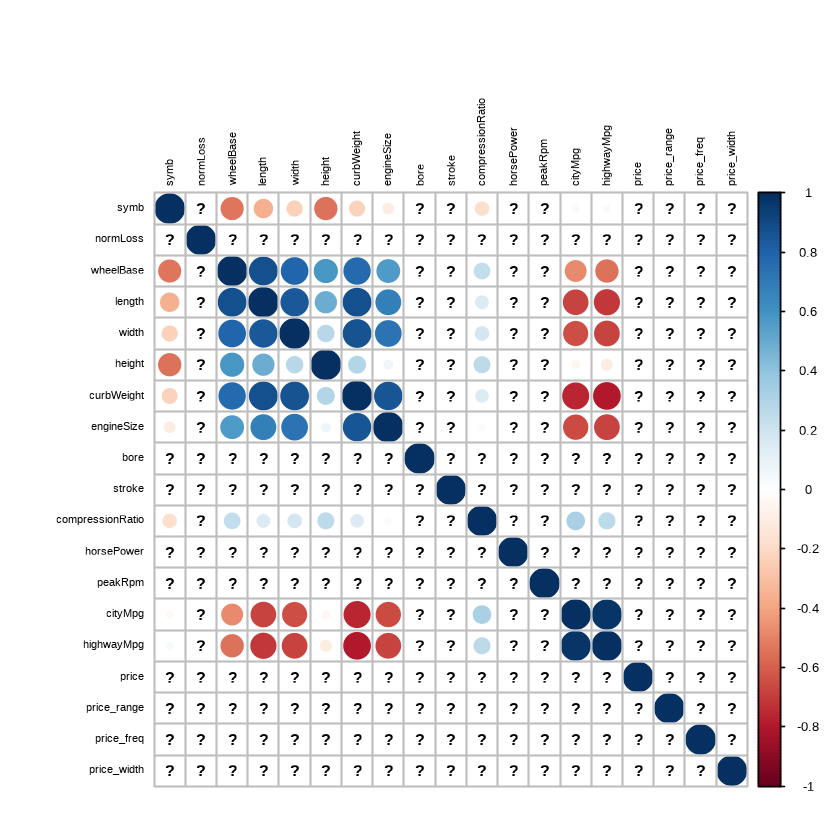

In [65]:

# Graficar la matriz de correlación
corrplot(matriz_correlacion, method = "circle", type = "full", tl.cex = 0.7, tl.col = "black")


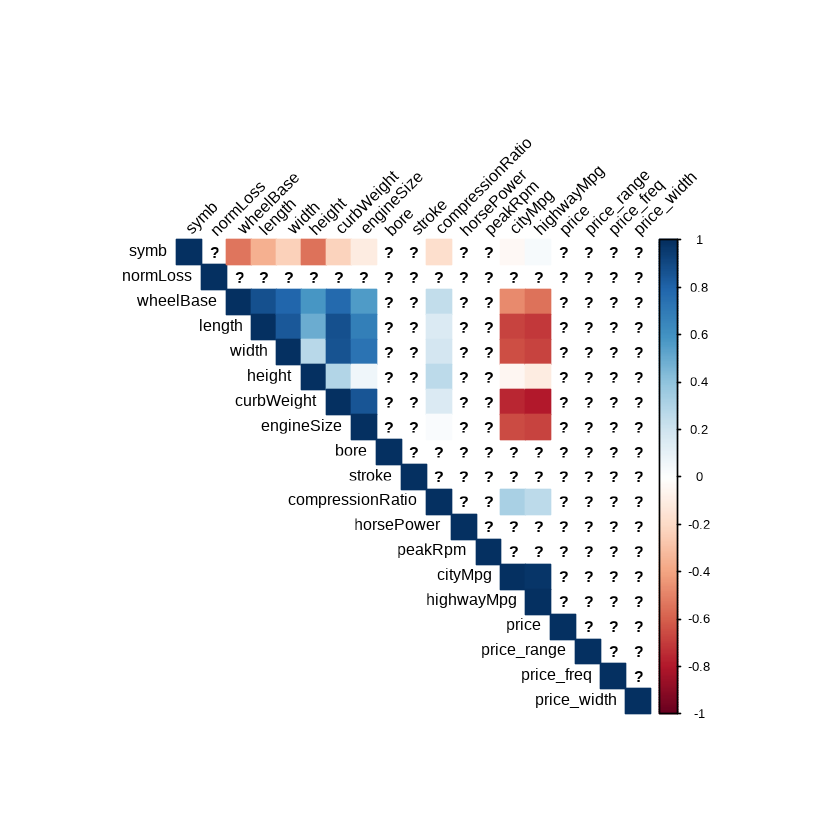

In [67]:
 corrplot(matriz_correlacion, method = "color", type = "upper", tl.col = "black", tl.srt = 45)

 5. **Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.**

In [68]:
# Cargar el paquete "datasets"
library(datasets)

# Cargar el conjunto de datos "USJudgeRatings"
data(USJudgeRatings)

# Verificar la estructura y las primeras filas del conjunto de datos
head(USJudgeRatings)


,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


1. Apply the function prcomp() to obtain the principal components. Inspect how each variable is obtained by the linear combination of each component.

In [69]:
# Aplicar la función prcomp() a los datos
pca <- prcomp(USJudgeRatings)

# Inspeccionar los resultados del PCA
summary(pca)


Importance of components:
                          PC1    PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     3.0299 0.9879 0.55470 0.46986 0.26398 0.1741 0.12895
Proportion of Variance 0.8476 0.0901 0.02841 0.02038 0.00643 0.0028 0.00154
Cumulative Proportion  0.8476 0.9377 0.96612 0.98650 0.99294 0.9957 0.99727
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.10868 0.08724 0.07122 0.05571 0.04397
Proportion of Variance 0.00109 0.00070 0.00047 0.00029 0.00018
Cumulative Proportion  0.99836 0.99907 0.99953 0.99982 1.00000

In [70]:
# Coeficientes de carga de las variables en cada componente
loadings <- pca$rotation

# Visualizar los coeficientes de carga
print(loadings)


             PC1          PC2         PC3          PC4         PC5          PC6
CONT  0.00599117  0.933248839 -0.31985402  0.112932711  0.09462326 -0.002863094
INTG -0.23476045 -0.138724061 -0.36981582  0.252211159  0.04590748 -0.463156453
DMNR -0.34774394 -0.232070496 -0.66343490  0.034666432 -0.19413671  0.360824575
DILG -0.28678321  0.047953743  0.22433991  0.272806418 -0.37555702 -0.563858944
CFMG -0.27201855  0.163199298  0.18935451 -0.024818035 -0.47964024  0.169861226
DECI -0.25330240  0.117624159  0.24920335 -0.024620949 -0.42029465  0.368776968
PREP -0.30910791  0.047023458  0.21702209  0.191109898  0.14553660 -0.063861767
FAMI -0.30510111  0.014033493  0.26692334  0.168833090  0.47073965  0.107554568
ORAL -0.33195277  0.009669279  0.03718715  0.007519155  0.25286574  0.141530777
WRIT -0.31396635 -0.018092578  0.11487882  0.141585317  0.29475017  0.227041086
PHYS -0.27750639  0.096014861  0.03603598 -0.859239241  0.09522754 -0.241473592
RTEN -0.35932337 -0.033595756 -0.1956340

2. Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can label each point with the lawyer’s name by setting the labels parameter.

ggbiplot no es compatible con esta version en R vamos a ocupar ggplot2

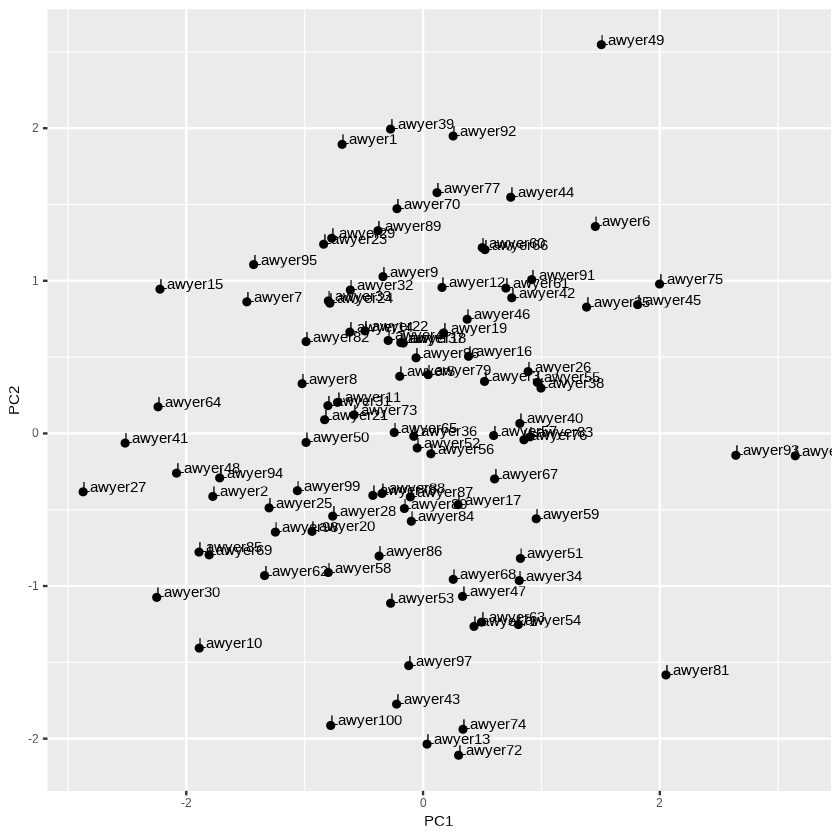

In [86]:
library(ggplot2)

# Datos ficticios para ejemplo
df <- data.frame(PC1 = rnorm(100), PC2 = rnorm(100), Lawyer = paste0("Lawyer", 1:100))

# Graficar los dos primeros componentes principales
ggplot(df, aes(x = PC1, y = PC2, label = Lawyer)) +
  geom_point() +
  geom_text(hjust = 0, vjust = 0)
